# Ch 2.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv("data/Auto.csv")

In [2]:
auto = auto.replace("?", np.nan)
auto["horsepower"] = auto["horsepower"].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
auto = auto.dropna()

## Ex 9

In [9]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [11]:
auto_quant = auto.drop(["name"], axis=1)
auto_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [4]:
for column in auto_quant.columns:
    min_value = auto_quant[column].min()
    max_value = auto_quant[column].max()
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")

Column: mpg, Min: 9.0, Max: 46.6
Column: cylinders, Min: 3, Max: 8
Column: displacement, Min: 68.0, Max: 455.0
Column: horsepower, Min: 46.0, Max: 230.0
Column: weight, Min: 1613, Max: 5140
Column: acceleration, Min: 8.0, Max: 24.8
Column: year, Min: 70, Max: 82
Column: origin, Min: 1, Max: 3


In [5]:
for column in auto_quant.columns:
    mean_value = auto_quant[column].mean()
    std_value = auto_quant[column].std()
    print(f"Col: {column}, Mean: {mean_value}, Std: {std_value}")

Col: mpg, Mean: 23.445918367346938, Std: 7.8050074865717995
Col: cylinders, Mean: 5.471938775510204, Std: 1.7057832474527845
Col: displacement, Mean: 194.41198979591837, Std: 104.64400390890466
Col: horsepower, Mean: 104.46938775510205, Std: 38.49115993282849
Col: weight, Mean: 2977.5841836734694, Std: 849.4025600429492
Col: acceleration, Mean: 15.541326530612244, Std: 2.758864119188082
Col: year, Mean: 75.9795918367347, Std: 3.6837365435778295
Col: origin, Mean: 1.5765306122448979, Std: 0.8055181834183056


In [6]:
auto_subset = auto.iloc[9:85, :-1]

print(f"{'Column':<15}{'Min':<10}{'Max':<10}{'Mean':<15}{'Std':<10}\n")
for column in auto_subset.columns:
    min_value = auto_subset[column].min()
    max_value = auto_subset[column].max()
    mean_value = auto_subset[column].mean()
    std_value = auto_subset[column].std()
    print(f"{column:<15}{min_value:<10}{max_value:<10}{mean_value:<15.2f}{std_value:<10.2f}")

Column         Min       Max       Mean           Std       

mpg            9.0       35.0      19.46          6.14      
cylinders      3         8         5.88           1.86      
displacement   70.0      455.0     224.23         119.33    
horsepower     46.0      225.0     120.05         45.42     
weight         1613      5140      3150.61        979.41    
acceleration   8.0       23.5      14.77          2.91      
year           70        73        71.13          0.82      
origin         1         3         1.47           0.74      


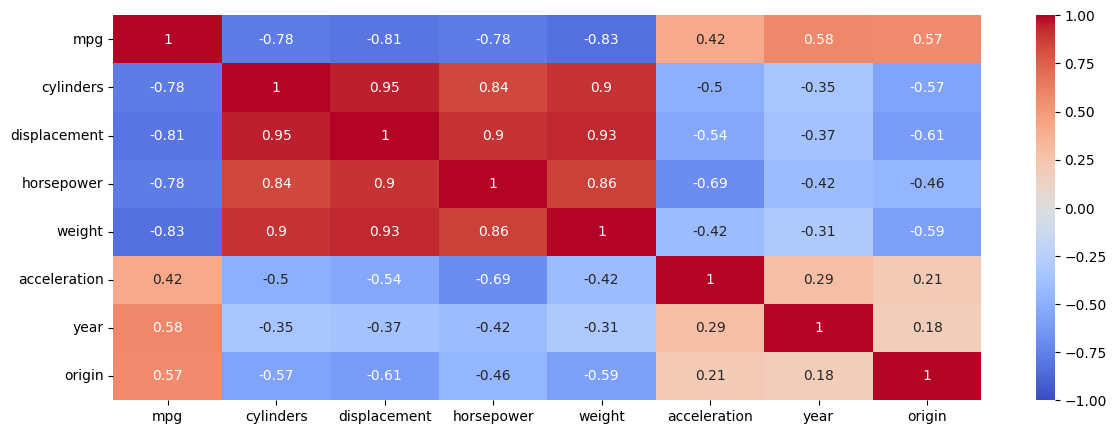

In [17]:
plt.figure(figsize=(14, 5))
sns.heatmap(auto_quant.corr("pearson").round(2), annot=True, center=0, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Ex 10

In [18]:
from ISLP import load_data

Boston = load_data('Boston')